In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, timedelta


In [3]:
data=pd.read_csv('data/DT_20210101_20211231.csv', sep='\t', encoding='latin-1')

In [4]:
data.head(3)

name                                    id        date  cuahang_id          sum        total        mon  customer       bill       vat  phuphi  male  female  num_of_bill  complain       chiphi        goods      returns  customer_info  hour_per_bill  hours  tour  expense  room       profit created_by created_date modified_by  modified_date  trangthai
0  ICOOL Ung V?n Khiêm  35360D09-544C-EB11-80FC-509A4C8C9FAC  01/01/2021           1  133260100.0  130995360.0  1601855.0  147515.0   515370.0       0.0       0   410     211           81         1  25600000.01  37121002.37  11424582.00             50            4.0    350  2.31        0    35  79698939.62     system      08:58.8      system            NaN          4
1     ICOOL Thành Thái  5B577AC1-534C-EB11-80FC-509A4C8C9FAC  01/01/2021          10   77961600.0   75168090.0  1069480.0  151200.0  1572830.0  494838.0       0   217     155           59         6  20213348.39  15139187.40  12119435.05             30            0.0      1  2.11        0    28  52429827.26     system      06:58.7      system            NaN          4
2    ICOOL Nguy?n Trãi  DAB10568-534C-EB11-80FC-509A4C8C9FAC  01/01/2021          11   41293000.0   39061845.0  1913300.0   66445.0   251410.0       0.0       0    85     120           34         2   6587311.84  18755490.95  10991668.00              6            4.0    160  2.13        0    16  24710710.21     system      04:28.6      system            NaN          4

In [5]:
data['tbbill']=round(data['total']/data['num_of_bill']/1000000,2)

In [6]:
data.head(2)

name                                    id        date  cuahang_id          sum        total        mon  customer       bill       vat  phuphi  male  female  num_of_bill  complain       chiphi        goods      returns  customer_info  hour_per_bill  hours  tour  expense  room       profit created_by created_date modified_by  modified_date  trangthai  tbbill
0  ICOOL Ung V?n Khiêm  35360D09-544C-EB11-80FC-509A4C8C9FAC  01/01/2021           1  133260100.0  130995360.0  1601855.0  147515.0   515370.0       0.0       0   410     211           81         1  25600000.01  37121002.37  11424582.00             50            4.0    350  2.31        0    35  79698939.62     system      08:58.8      system            NaN          4    1.62
1     ICOOL Thành Thái  5B577AC1-534C-EB11-80FC-509A4C8C9FAC  01/01/2021          10   77961600.0   75168090.0  1069480.0  151200.0  1572830.0  494838.0       0   217     155           59         6  20213348.39  15139187.40  12119435.05             30            0.0      1  2.11        0    28  52429827.26     system      06:58.7      system            NaN          4    1.27

In [7]:
set(data['room'])

{14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 35, 36, 37}

#### so phong: room
#### tua phong = so bill / so phong

In [8]:
# data_02[data_02.date > "2022-02-10"]

In [9]:
myDict={'Ung Văn Khiêm': 1, 
        'Xô Viết Nghệ Tĩnh': 4,
        'Tô Ký': 5,
        'Bình Phú': 6,
        'Dương Bá Trạc': 7,
        'Nguyễn Sơn': 9,
        'Thành Thái': 10,
        'Nguyễn Trãi': 11,
        'Mạc Đĩnh Chi': 12,
        'Trần Bình Trọng': 13,
        'CMT8': 14,
        'Cầu Chữ Y': 16,
        'Nhị Thiên Đường': 17,
        'Trần Não': 18,
        'Nguyễn Tri Phương': 19,
        'Đồng Đen': 22,
        'Phan Chu Trinh': 23,
        'Phan Xích Long': 24,
        'Vũng Tàu': 25,
        'Phú Quốc': 26}



In [10]:
data_02=data[['date', 'cuahang_id', 'total']]
data_02['total']=round(data_02['total']/1000000, 2)

In [11]:
data_02.head()

date  cuahang_id   total
0  01/01/2021           1  131.00
1  01/01/2021          10   75.17
2  01/01/2021          11   39.06
3  01/01/2021          12   66.30
4  01/01/2021          13   50.43

In [12]:
data_02['date'] =  pd.to_datetime(data_02['date'], format='%d/%m/%Y')


In [13]:
data_02.head()

date  cuahang_id   total
0 2021-01-01           1  131.00
1 2021-01-01          10   75.17
2 2021-01-01          11   39.06
3 2021-01-01          12   66.30
4 2021-01-01          13   50.43

In [14]:
date=data_02.loc[0,'date']

#### 1. add feature current: date, month, year

In [15]:
## M T W T F S S
## 1 2 3 4 5 6 7 
week_days=[]
days_of_month=[]
month_of_year=[]
current_year=[]
for i in data_02.index:
    date=data_02.loc[i,'date']
    week_days.append(date.weekday()+2)
    days_of_month.append(date.day)
    month_of_year.append(date.month)
    current_year.append(date.year)



In [16]:
data_02['week_days']=week_days
data_02['days_of_month']=days_of_month
data_02['month_of_year']=month_of_year
data_02['current_year']=current_year

In [17]:
data_02.head()

date  cuahang_id   total  week_days  days_of_month  month_of_year  current_year
0 2021-01-01           1  131.00          6              1              1          2021
1 2021-01-01          10   75.17          6              1              1          2021
2 2021-01-01          11   39.06          6              1              1          2021
3 2021-01-01          12   66.30          6              1              1          2021
4 2021-01-01          13   50.43          6              1              1          2021

#### 2. add feature price of yesterday, 2 days, 3 days, 4 days, 5 days, 6 days, 7 days, ..., 14 days, last month

In [18]:
data_02_CH01=data_02[data_02.cuahang_id==1]

In [19]:
data_02_CH01.head()

date  cuahang_id   total  week_days  days_of_month  month_of_year  current_year
0  2021-01-01           1  131.00          6              1              1          2021
18 2021-01-02           1  109.18          7              2              1          2021
36 2021-01-03           1   59.16          8              3              1          2021
54 2021-01-04           1   66.05          2              4              1          2021
72 2021-01-05           1   67.60          3              5              1          2021

In [20]:
data_02_CH01.shape

(106, 7)

In [21]:
## M T W T F S S
## 2 3 4 5 6 7 8

## price 1 day
def get_history_price(nday):
    ## get price of history nday
    yesterday=date-timedelta(nday)
    tmp=data_02_CH01[(data_02_CH01['current_year']==yesterday.year) & (data_02_CH01['month_of_year']==yesterday.month) & (data_02_CH01['days_of_month']==yesterday.day)]
    if tmp.shape[0]!=0:
        return tmp['total'].tolist()[0]
    else:
        for x in range(1,100):
            
            new_date=date-timedelta(7*x)
            tmp=data_02_CH01[(data_02_CH01['current_year']==yesterday.year) & (data_02_CH01['month_of_year']==new_date.month) & (data_02_CH01['days_of_month']==new_date.day)]
            if tmp.shape[0]!=0:
                return tmp['total'].tolist()[0]
        return 0

containers=[]
for i in data_02_CH01.index:
    date=data_02_CH01.loc[i,'date']
    result={}
    current_date=str(date).replace(' 00:00:00', '')
    result['date']=current_date
    result['price_1day']=get_history_price(1)
    result['price_2day']=get_history_price(2)
    result['price_3day']=get_history_price(3)
    result['price_4day']=get_history_price(4)
    result['price_5day']=get_history_price(5)
    result['price_6day']=get_history_price(6)
    result['price_7day']=get_history_price(7)
    result['price_2w']=get_history_price(14)
    result['price_3w']=get_history_price(21)

    containers.append(result)


In [22]:
data_03=pd.DataFrame(containers)

In [23]:
data_03.head(3)

date  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
0  2021-01-01        0.00         0.0         0.0         0.0         0.0         0.0         0.0       0.0       0.0
1  2021-01-02      131.00         0.0         0.0         0.0         0.0         0.0         0.0       0.0       0.0
2  2021-01-03      109.18       131.0         0.0         0.0         0.0         0.0         0.0       0.0       0.0

In [74]:
data_03.tail()

date  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
101 2021-12-24       26.76       25.20       10.00       19.30       66.30       27.53       25.88     25.88     25.88
102 2021-12-25       31.20       26.76       25.20       10.00       19.30       66.30       27.53     27.53     27.53
103 2021-12-26       50.44       31.20       26.76       25.20       10.00       19.30       66.30     66.30     66.30
104 2021-12-27       11.51       50.44       31.20       26.76       25.20       10.00       19.30     19.30     19.30
105 2021-12-28       12.12       11.51       50.44       31.20       26.76       25.20       10.00     71.42     10.00

In [25]:
data_03['date'] =  pd.to_datetime(data_03['date'], format='%Y-%m-%d')


In [26]:
data_04 = pd.merge(data_02_CH01, data_03,
                        how="left", on=["date"])

In [98]:
data_04.tail(3)

date  cuahang_id  total  week_days  days_of_month  month_of_year  current_year  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
103 2021-12-26           1  11.51          8             26             12          2021       50.44       31.20       26.76       25.20       10.00        19.3        66.3     66.30      66.3
104 2021-12-27           1  12.12          2             27             12          2021       11.51       50.44       31.20       26.76       25.20        10.0        19.3     19.30      19.3
105 2021-12-28           1  18.24          3             28             12          2021       12.12       11.51       50.44       31.20       26.76        25.2        10.0     71.42      10.0

In [28]:
data_04.columns

Index(['date', 'cuahang_id', 'total', 'week_days', 'days_of_month', 'month_of_year', 'current_year', 'price_1day', 'price_2day', 'price_3day', 'price_4day', 'price_5day', 'price_6day', 'price_7day', 'price_2w', 'price_3w'], dtype='object')

In [99]:
data_041=data_04[['date', 'total', 'week_days', 'days_of_month', 'month_of_year', 'current_year', 'price_1day', 
    'price_2day', 'price_3day', 'price_4day', 'price_5day', 'price_6day', 'price_7day', 'price_2w', 'price_3w']]

data_041.head()

date   total  week_days  days_of_month  month_of_year  current_year  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
0 2021-01-01  131.00          6              1              1          2021        0.00        0.00        0.00         0.0         0.0         0.0         0.0       0.0       0.0
1 2021-01-02  109.18          7              2              1          2021      131.00        0.00        0.00         0.0         0.0         0.0         0.0       0.0       0.0
2 2021-01-03   59.16          8              3              1          2021      109.18      131.00        0.00         0.0         0.0         0.0         0.0       0.0       0.0
3 2021-01-04   66.05          2              4              1          2021       59.16      109.18      131.00         0.0         0.0         0.0         0.0       0.0       0.0
4 2021-01-05   67.60          3              5              1          2021       66.05       59.16      109.18       131.0         0.0         0.0         0.0       0.0       0.0

In [100]:
data_042=data_041[['week_days', 'days_of_month', 'month_of_year', 'current_year', 'price_1day', 
    'price_2day', 'price_3day', 'price_4day', 'price_5day', 'price_6day', 'price_7day', 'price_2w', 'price_3w']]


In [101]:
data_05X=data_042.to_numpy()

# data_05X=data_04[['week_days', 'days_of_month', 'month_of_year', 'current_year']].to_numpy()
## need to add holidays, number room, price Dishes, price Hour

In [102]:
data_05X.shape

(106, 13)

In [103]:
data_05X[-1]

array([   3.  ,   28.  ,   12.  , 2021.  ,   12.12,   11.51,   50.44,
         31.2 ,   26.76,   25.2 ,   10.  ,   71.42,   10.  ])

In [104]:
data_05Y=data_04['total'].to_numpy()

In [105]:
data_05Y[:3]

array([131.  , 109.18,  59.16])

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(data_05X, data_05Y)
print(regr.predict([data_05X[-1]]))


[21.8055]


#### predict next n days

In [107]:
set(data_04['week_days'].tolist())

{2, 3, 4, 5, 6, 7, 8}

In [108]:
data_05Y[-1]

18.24

In [109]:
from datetime import datetime

## predict from ndays
start_date='2021-01-07'
next_days=100

first_date = datetime.fromisoformat(start_date)
container=[]
for i in range(next_days):
    current=first_date+timedelta(i)
    container.append({
        # 'date': str(current).split()[0],
        'date': current,
        'week_days': current.weekday()+2,
        'days_of_month': current.day,
        'month_of_year': current.month,
        'current_year': current.year,
    })



In [117]:
from datetime import datetime

## predict from ndays
start_date='2021-01-07'
before_start_date=data_041[data_041['date']<start_date]

next_days=10

first_date = datetime.fromisoformat(start_date)
container=[]
for i in range(next_days):
    current=first_date+timedelta(i)

    ## date feature
    container.append({
        # 'date': str(current).split()[0],
        'date': current,
        'week_days': current.weekday()+2,
        'days_of_month': current.day,
        'month_of_year': current.month,
        'current_year': current.year, 
    })

    ## price feature
    ## now is 2021-01-07
    price_1day=get_history_price(1)
    # price_1day=regr.predict([x])



## M T W T F S S
## 2 3 4 5 6 7 8

## price 1 day
def get_history_price_inference(nday, first_date):
    ## get price of history nday
    yesterday=first_date-timedelta(nday)

    ## if nday=1, predict
    tmp=before_start_date[before_start_date['date']==yesterday]
    if tmp.shape[0]!=0:
        return tmp['total'].tolist()[0]
    else:
        for x in range(1,100):
            
            new_date=date-timedelta(7*x)
            tmp=before_start_date[(before_start_date['current_year']==yesterday.year) & \
                (before_start_date['month_of_year']==new_date.month) & (before_start_date['days_of_month']==new_date.day)]
                
            if tmp.shape[0]!=0:
                return tmp['total'].tolist()[0]
        return 0

In [120]:
get_history_price_inference(1, first_date)

98.38

In [118]:
before_start_date

date   total  week_days  days_of_month  month_of_year  current_year  price_1day  price_2day  price_3day  price_4day  price_5day  price_6day  price_7day  price_2w  price_3w
0 2021-01-01  131.00          6              1              1          2021        0.00        0.00        0.00        0.00         0.0         0.0         0.0       0.0       0.0
1 2021-01-02  109.18          7              2              1          2021      131.00        0.00        0.00        0.00         0.0         0.0         0.0       0.0       0.0
2 2021-01-03   59.16          8              3              1          2021      109.18      131.00        0.00        0.00         0.0         0.0         0.0       0.0       0.0
3 2021-01-04   66.05          2              4              1          2021       59.16      109.18      131.00        0.00         0.0         0.0         0.0       0.0       0.0
4 2021-01-05   67.60          3              5              1          2021       66.05       59.16      109.18      131.00         0.0         0.0         0.0       0.0       0.0
5 2021-01-06   98.38          4              6              1          2021       67.60       66.05       59.16      109.18       131.0         0.0         0.0       0.0       0.0

In [121]:
predict_tmp=pd.DataFrame(container)

In [122]:
predict_tmp.head()


date  week_days  days_of_month  month_of_year  current_year
0 2021-01-07          5              7              1          2021
1 2021-01-08          6              8              1          2021
2 2021-01-09          7              9              1          2021
3 2021-01-10          8             10              1          2021
4 2021-01-11          2             11              1          2021

In [124]:
# predict_tmp_array=predict_tmp[['week_days', 'days_of_month', 'month_of_year', 'current_year']].to_numpy()
# predict_val=[regr.predict([x]) for x in predict_tmp_array]
# predict_val=[x[0] for x in predict_val]


In [41]:
predict_val[:4]

[106.06690000000005,
 139.01680000000016,
 162.85540000000012,
 126.99950000000017]

In [42]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(predict_val, data_05Y[-next_days:], squared=False)

In [43]:
rmse

59.73438229976937

In [62]:
predict_tmp['predict']=predict_val
predict_tmp['gt']=data_05Y[-next_days:]

In [63]:
predict_tmp.head()

date  week_days  days_of_month  month_of_year  current_year   predict      gt
0 2021-01-07          5              7              1          2021  106.0669  104.17
1 2021-01-08          6              8              1          2021  139.0168  143.12
2 2021-01-09          7              9              1          2021  162.8554  176.19
3 2021-01-10          8             10              1          2021  126.9995  117.10
4 2021-01-11          2             11              1          2021   90.9118   99.18

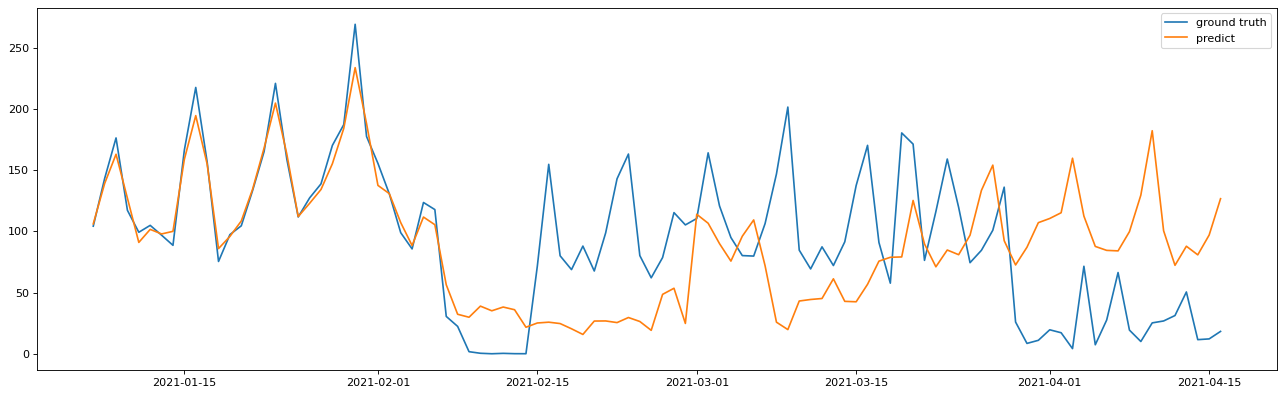

In [64]:
import matplotlib.pyplot as plt
import datetime
from matplotlib.pyplot import figure
figure(figsize=(20, 6), dpi=80)

plt.plot(predict_tmp['date'],predict_tmp['gt'], label='ground truth')
plt.plot(predict_tmp['date'],predict_tmp['predict'], label='predict')
plt.legend()
plt.show()

#### rmspe

In [61]:
# rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
import numpy as np

def rmspe_list(list_predict, list_gt):
    se=[]
    for n,e in enumerate(list_gt):
        try:
            e1 = np.square((e - list_predict[n]) / e)
            se.append(e1)

        except:
            print(e)
    rmspe=np.sqrt(np.mean(se))*100
    return rmspe

rmspe=rmspe_list(predict_tmp['predict'].tolist(), predict_tmp['gt'].tolist())
rmspe


0.0


9549.30402858353